In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('country_vaccinations.csv')

In [ ]:
df.head()

In [ ]:
## CHECKING HOW MANY NaNs ACTUALLY IS IN THE TABLE ::
df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     28537
people_vaccinated                      30141
people_fully_vaccinated                32945
daily_vaccinations_raw                 34531
daily_vaccinations                       339
total_vaccinations_per_hundred         28537
people_vaccinated_per_hundred          30141
people_fully_vaccinated_per_hundred    32945
daily_vaccinations_per_million           339
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
## FILLING NaNs WITH ZEROS ::
df.fillna(0, inplace=True)

In [ ]:
## CHECKING IF THERE ARE ROWS WITH ISO_CODE = 0
(df['iso_code'] == 0).sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61820 entries, 0 to 61819
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              61820 non-null  object 
 1   iso_code                             61820 non-null  object 
 2   date                                 61820 non-null  object 
 3   total_vaccinations                   61820 non-null  float64
 4   people_vaccinated                    61820 non-null  float64
 5   people_fully_vaccinated              61820 non-null  float64
 6   daily_vaccinations_raw               61820 non-null  float64
 7   daily_vaccinations                   61820 non-null  float64
 8   total_vaccinations_per_hundred       61820 non-null  float64
 9   people_vaccinated_per_hundred        61820 non-null  float64
 10  people_fully_vaccinated_per_hundred  61820 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
## CONVERTING COLUMN "DATE" TO DATE TYPE FROM TYPE 'OBJECT'
format='%Y-%m-%d'
df['date'] = pd.to_datetime(df['date'], format=format)

In [ ]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [ ]:
## DROPPING COLUMNS I WON'T USE:
df.drop(['source_name', 'source_website'], axis=1, inplace=True)

In [ ]:
## CHECKING NUMBER OF RECORDS FOR COUNTRIES: POL, USA AND ISOLATING THEM IN SEPARATE DF'S
pol = (df['country'] == 'Poland').sum()
usa = (df['country'] == 'United States').sum()
print(f'Poland - {pol} records')
print(f'USA - {usa} records')
df_POL = df[df['iso_code'] == 'POL']
df_USA = df[df['iso_code'] == 'USA']

Poland - 342 records
USA - 357 records


In [ ]:
df_USA.head(50)

In [ ]:
## WE NEED TO REMOVE ROWS WHERE TOTAL VACCS ARE ZERO:
df_POL.drop(df_POL.index[df_POL['total_vaccinations'] == 0], inplace=True)
df_USA.drop(df_USA.index[df_USA['total_vaccinations'] == 0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_USA.head()

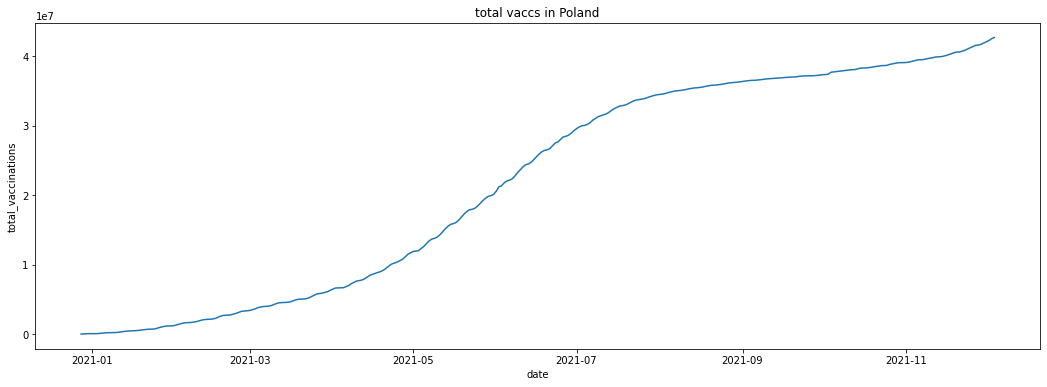

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_POL, x='date', y='total_vaccinations')
plt.title('total vaccs in Poland')
plt.xticks(rotation=0)
plt.show()

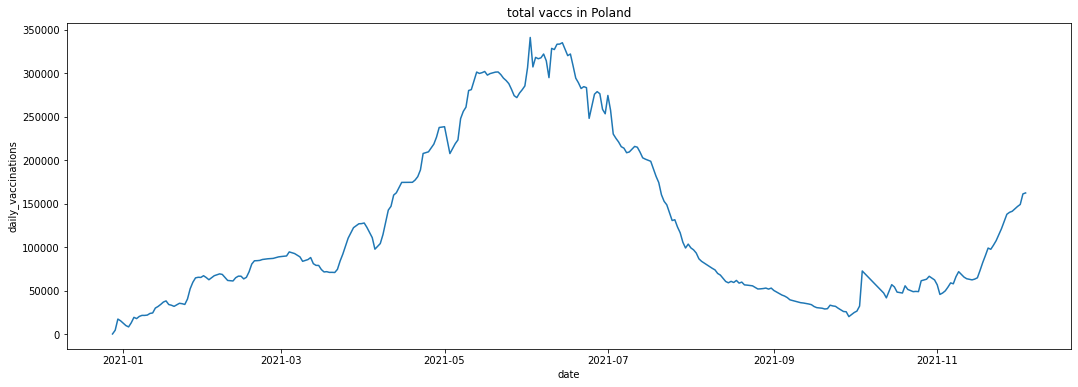

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_POL, x='date', y='daily_vaccinations')
plt.title('total vaccs in Poland')
plt.xticks(rotation=0)
plt.show()

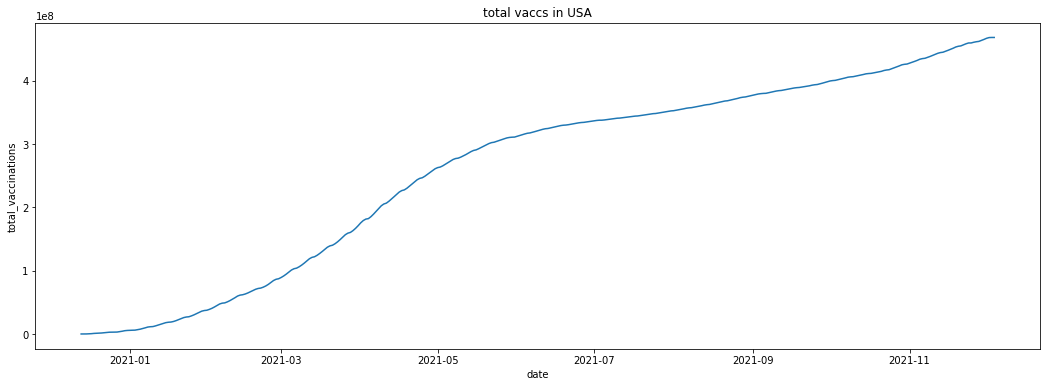

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x='date', y='total_vaccinations')
plt.title('total vaccs in USA')
plt.xticks(rotation=0)
plt.show()

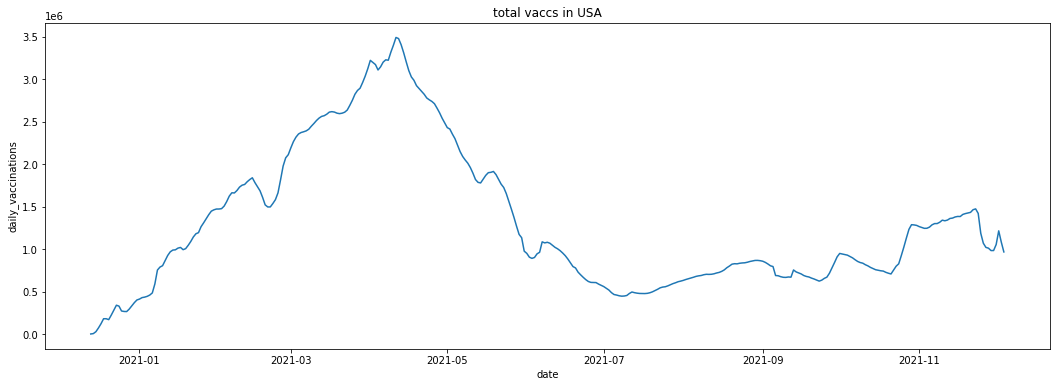

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x='date', y='daily_vaccinations')
plt.title('total vaccs in USA')
plt.xticks(rotation=0)
plt.show()

In [ ]:
## TOP 10 COUNTRIES WITH THE HIGHEST AMOUNT OF VACCINATED PEOPLE PER 100 OF THE POPULATION
## WAZNE!! : W MOMENCIE GDY ZROBI SIE GROUP BY 'JAKAS KOLUMNA', KOLUMNA STAJE SIE INDEKSEM
## DLATEGO POTEM BEDZIE PLOTOWANE PO INDEKSIE
vacc_by_country = (df.groupby('country').max()).sort_values('total_vaccinations', ascending=False)
vacc_by_country = vacc_by_country.iloc[:10]


In [ ]:
## SORT PER 100
vacc_by_country = vacc_by_country.sort_values('total_vaccinations_per_hundred', ascending=False)
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
country,,,,,,,,,,,,
China,CHN,2021-12-04,2.543424e+09,1.225000e+09,1.110506e+09,24741000.0,22424286.0,176.11,84.82,76.89,15527.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Japan,JPN,2021-12-02,1.974232e+08,9.986151e+07,9.755810e+07,6586453.0,1997542.0,156.62,79.22,77.40,15847.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Germany,DEU,2021-12-03,1.266218e+08,5.976498e+07,5.732369e+07,1429151.0,875304.0,150.92,71.23,68.32,10433.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Brazil,BRA,2021-12-04,3.144508e+08,1.645436e+08,1.368306e+08,3002675.0,1941268.0,146.94,76.89,63.94,9072.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
United States,USA,2021-12-04,4.685168e+08,2.352980e+08,1.970743e+08,4513858.0,3493409.0,141.12,70.87,59.36,10522.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Vietnam,VNM,2021-12-03,1.268468e+08,7.315530e+07,5.369147e+07,2091069.0,1675471.0,129.21,74.52,54.69,17067.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Mexico,MEX,2021-12-02,1.332562e+08,7.736631e+07,6.516687e+07,7246123.0,1648223.0,102.30,59.39,50.03,12653.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
India,IND,2021-12-04,1.273806e+09,7.997455e+08,4.740607e+08,18627269.0,10037995.0,91.42,57.39,34.02,7204.0,"Covaxin, Oxford/AstraZeneca, Sputnik V"
Russia,RUS,2021-12-04,1.302656e+08,6.799171e+07,5.848006e+07,2389472.0,1020075.0,89.28,46.60,40.08,6991.0,"EpiVacCorona, Sputnik V"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

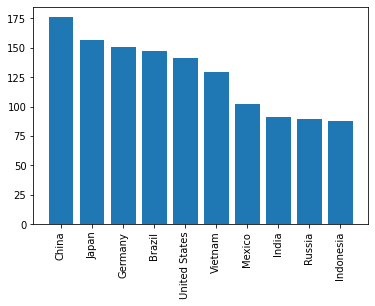

In [ ]:
plt.bar(vacc_by_country.index, vacc_by_country.total_vaccinations_per_hundred)
plt.xticks(rotation=90)

In [ ]:
vacc_names_by_country = (df.groupby('vaccines').max()).sort_values('total_vaccinations', ascending=False)
vacc_names_by_country

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
vaccines,,,,,,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2021-12-04,2.543424e+09,1.225000e+09,1.110506e+09,24741000.0,22424286.0,176.11,84.82,76.89,15527.0
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-04,1.273806e+09,7.997455e+08,4.740607e+08,18627269.0,10037995.0,91.42,57.39,34.02,7204.0
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-04,4.685168e+08,2.352980e+08,1.970743e+08,4513858.0,3493409.0,170.50,78.79,76.78,15335.0
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2021-12-04,3.144508e+08,1.645436e+08,1.368306e+08,3002675.0,1941268.0,146.94,76.89,63.94,9072.0
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2021-12-04,2.414419e+08,1.424323e+08,9.900958e+07,3087420.0,1901294.0,87.36,51.54,35.83,6880.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"Johnson&Johnson, Moderna",Haiti,HTI,2021-11-19,1.847690e+05,1.182220e+05,6.688800e+04,14852.0,5695.0,1.60,1.02,0.58,493.0
"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Seychelles,SYC,2021-11-29,1.794620e+05,8.193700e+04,7.795100e+04,3758.0,2401.0,181.44,82.84,78.81,24275.0
"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",Antigua and Barbuda,ATG,2021-11-26,1.176370e+05,6.141800e+04,5.621900e+04,2221.0,1278.0,119.15,62.21,56.94,12945.0


In [ ]:
vacc_names_by_country = vacc_names_by_country.iloc[:10]
vacc_names_by_country = vacc_names_by_country.reset_index()
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2021-12-04,2.543424e+09,1.225000e+09,1.110506e+09,24741000.0,22424286.0,176.11,84.82,76.89,15527.0
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-04,1.273806e+09,7.997455e+08,4.740607e+08,18627269.0,10037995.0,91.42,57.39,34.02,7204.0
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-04,4.685168e+08,2.352980e+08,1.970743e+08,4513858.0,3493409.0,170.50,78.79,76.78,15335.0
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2021-12-04,3.144508e+08,1.645436e+08,1.368306e+08,3002675.0,1941268.0,146.94,76.89,63.94,9072.0
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,IDN,2021-12-04,2.414419e+08,1.424323e+08,9.900958e+07,3087420.0,1901294.0,87.36,51.54,35.83,6880.0
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-12-04,1.974232e+08,9.986151e+07,9.755810e+07,6586453.0,1997542.0,185.35,80.79,77.40,22778.0
6,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2021-12-02,1.332562e+08,7.736631e+07,6.516687e+07,7246123.0,1648223.0,102.30,59.39,50.03,12653.0
7,"EpiVacCorona, Sputnik V",Russia,RUS,2021-12-04,1.302656e+08,6.799171e+07,5.848006e+07,2389472.0,1020075.0,89.28,46.60,40.08,6991.0
8,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Vietnam,VNM,2021-12-03,1.268468e+08,7.315530e+07,5.369147e+07,2091069.0,1675471.0,138.12,74.52,63.99,22125.0
9,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,ROU,2021-12-04,1.266218e+08,5.976498e+07,5.732369e+07,1429151.0,875304.0,193.68,89.04,87.78,21977.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

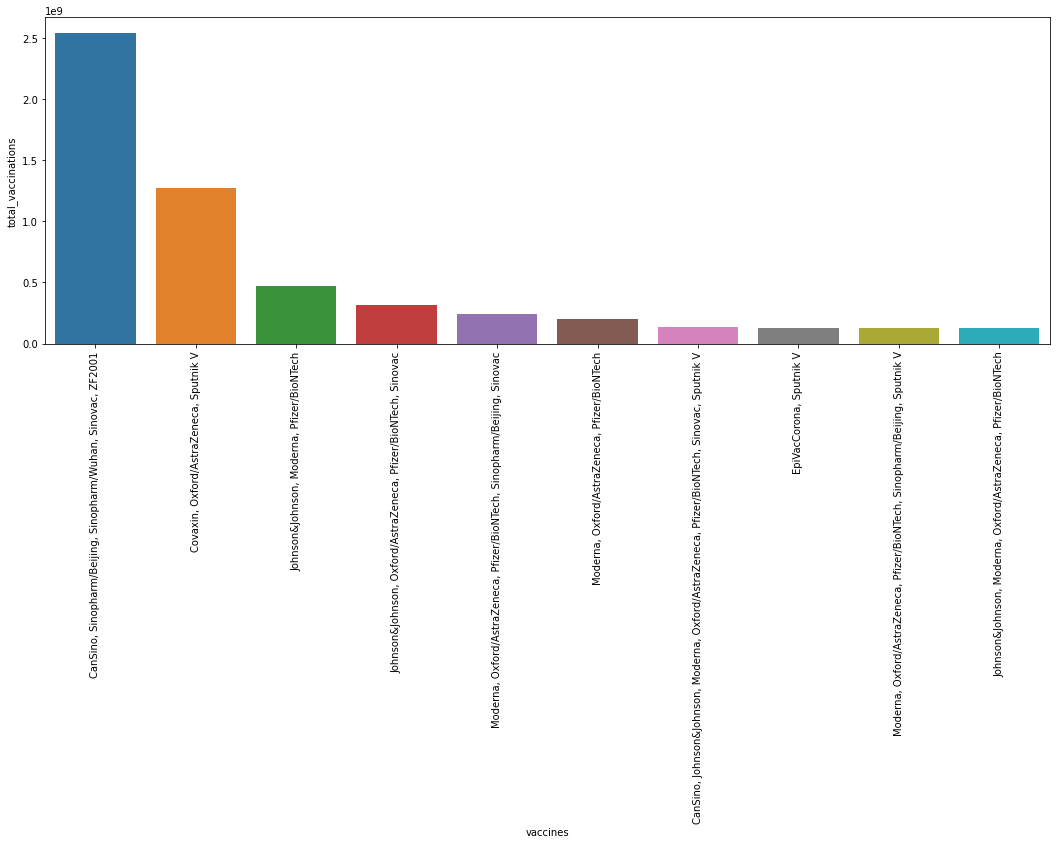

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(data=vacc_names_by_country, x='vaccines', y='total_vaccinations')
plt.xticks(rotation=90)